# 준비물

### 가상환경 : Captcha Crack을 하기 위해서는 패키지간의 호환이 필요하며 이를 위해 반드시 다운그레이드를 해야한다. 이 과정에서 패키지간의 충돌이 발생할 가능성이 높기 때문에 처음부터 가상환경을 설치 후 버전에 맞는 패키지 설치가 필요하다. 가상환경의 패키지는 아나콘다 프롬프트에서 가상환경 접속 후 pip install을 통해서 설치하면 된다.

#### Python version : 3.9.0 

- 설치 순서도 중요하다
#### numpy version : 1.19.5
#### captchacracker version : 0.0.7
#### tensorflow version : 2.5.0
#### 추가 pip instanll Pillow

- 실전 사용을 위한 준비물
#### 크롬드라이버 다운로드 후 작업환경과 같은 위치에 크롬드라이버 이동 : https://googlechromelabs.github.io/chrome-for-testing/


In [23]:
import sys
import numpy as np
import tensorflow as tf
import CaptchaCracker as cc
print('Python Version :',sys.version )
print('Numpy Version :', np.__version__)
print('tensorflow Version :', tf.__version__)
print('captchacracker Version :', cc.__version__)
import requests as rq
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from urllib.request import urlretrieve
from PIL import ImageGrab
from PIL import Image
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.action_chains import ActionChains
import glob
import time

Python Version : 3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)]
Numpy Version : 1.19.5
tensorflow Version : 2.5.0
captchacracker Version : 0.0.7


# Captcha 문자는 종류가 여러개인데 해당 코드에서 사용되는 captcha 문자는 아래와 같다

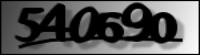

In [31]:
from IPython.display import Image, display
image_path = "munja.png"
display(Image(filename=image_path))

# train 데이터 수집 - 새마을금고 정기공시 사이트
## 현재 시점(2025.01.10) 새마을금고 정기공시 조회 시 캡차 문자가 사라져서 Github에 라벨링 된 데이터 압축 파일로 업로드

In [ ]:
# train 데이터 수집
chromedriver_path = './chromedriver.exe'
service = Service(chromedriver_path)
service.start()
driver = webdriver.Chrome(service=service)
url = f'https://www.kfcc.co.kr/gumgo/regulardisclosure.do?pageRows=10&pageUnit=10&totalRows=1284&currentPageNo=1&baseYear=2023&baseMonth=12&seachGubun=1&gumgoStDate=202312&pageNo=1'
driver.get(url)
time.sleep(2)
driver.maximize_window()
driver.find_element(By.XPATH,f'/html/body/div[3]/div[2]/div[2]/div[1]/div[1]/div/ul/li[2]/div[1]/a').click()
time.sleep(2)
for i in range(600):
    with open(f'munja{i}.png', 'wb') as file: # 웹에 있는 보안문자위치 소스상에서 추출
        l = driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/ul/li[1]/div/div/div/img') 
        file.write(l.screenshot_as_png)
    time.sleep(1)
    target_img_path = f'munja{i}.png'    #타켓 이미지 경로
    time.sleep(1)
    driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/ul/li[1]/div/div/div/input[1]').click() # 웹 페이지상의 로고침 버튼
    time.sleep(1)
    driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/ul/li[1]/div/div/div/input[1]').click()

#이미지를 저장할 디렉토리
source_folder = "D:/Users/ghleec/Desktop/raw_img/"
# 변경된 이미지를 저장할 디렉토리
output_folder = "D:/Users/ghleec/Desktop/img_new/"
# 이미지 파일 경로 리스트
image_paths = glob.glob(source_folder + "*.png")

# 각 이미지에 대해
for img_path in image_paths:
    # 이미지 파일 로드
    with Image.open(img_path) as img:
        # 이미지 크기 조정, Image.Resampling.LANCZOS 사용
        img_resized = img.resize((150, 50), Image.Resampling.LANCZOS)
        # 변경된 이미지 저장
        img_resized.save(output_folder + os.path.basename(img_path))

# 데이터 수집 후 직접 숫자를 라벨링하여 학습 데이터를 만들어야함. 대략 600개 정도만 되어도 정확도가 매우 높음

# 캡처된 이미지 학습하기

In [ ]:
import glob
import CaptchaCracker as cc

# 학습 데이터 경로
train_img_path_list = glob.glob("D:/Users/ghleec/Desktop/raw_img/")
# 이미지 사이즈
img_width = 200
img_height = 55

CM = cc.CreateModel(train_img_path_list, img_width, img_height)
model = CM.train_model(epochs=len(train_img_path_list))

# 학습 완료된 모델의 wight 저장
model.save_weights("D:/Users/ghleec/Desktop/new_contry_bank.h5")

# 학습 완료된 모델로 실제 test

In [ ]:
import CaptchaCracker as cc

img_width = 200
img_height = 55
# 타겟이 되는 숫자의 개수
max_length = 6
# 타겟이 되는 문자의 종류
characters = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

# 모델 파일 경로
weights_path = "D:/Users/ghleec/Desktop/new_contry_bank.h5"
# 모델 적용 파라미터
AM = cc.ApplyModel(weights_path, img_width, img_height, max_length, characters)

# test시킬 파일 경로와 이름
target_img_path = "D:/Users/ghleec/Desktop/새 폴더/202059.png"

# 예측값
pred = AM.predict(target_img_path)
print(pred)

# 실제 크롤링 시 적용
## 현재 시점(2025.01.10) 새마을금고 정기공시 조회 시 캡차 문자가 사라짐
## 웹페이지는 달라져도 while문 안에 핵심 부분만 떼어서 다른 곳에 적용 가능

In [ ]:
# 웹 페이지 열기
chromedriver_path = './chromedriver.exe'
service = Service(chromedriver_path)
service.start()
driver = webdriver.Chrome(service=service)
url = f'https://www.kfcc.co.kr/gumgo/regulardisclosure.do?pageRows=10&pageUnit=10&totalRows=1284&currentPageNo=1&baseYear=2023&baseMonth=12&seachGubun=1&gumgoStDate=202312&pageNo={a}'
driver.get(url)
time.sleep(2)
driver.maximize_window()
time.sleep(1)

# 첫 번째 공시 자료 클릭
driver.find_element(By.XPATH,f'/html/body/div[3]/div[2]/div[2]/div[1]/div[1]/div/ul/li[{i}]/div[1]').click()
time.sleep(1)

try:
    if len(driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/h3').text)>0:
        driver.back()
        time.sleep(0.5)

        # 지점 클릭
        driver.find_element(By.XPATH,f'/html/body/div[3]/div[2]/div[2]/div[1]/div[1]/div/ul/li[{i}]/div[1]').click()
        time.sleep(0.5)
        ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform() # 스크린샷을 위한 페이지 다운 버튼 클릭 (페이지 스크롤 내리기)
        time.sleep(1)
        
        # *****여기가 핵심***********
        while True:
            try:
                # 캡차 문자 뚫고 입력
                with open('munja.png', 'wb') as file:
                    # 이미지 파일 다운로드
                    l = driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/ul/li[1]/div/div/div/img') 
                    file.write(l.screenshot_as_png)
                time.sleep(1)
                # 다운로드한 이미지 파일 파라미터 입력
                target_img_path = 'munja.png'  
                img_width = 200
                img_height = 55
                img_length = 6 
                img_char = {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}   
                # 이전에 train으로 생성한 모델(weight) 적용
                weights_path = 'D:/Users/ghleec/Desktop/new_contry_bank.h5"
                AM = cc.ApplyModel(weights_path, img_width, img_height, img_length, img_char)   
                pred = AM.predict(target_img_path)  #결과 도출
                time.sleep(4)
                print(b_name, pred)
                # 문자 입력 박스에 생성 된 'pred' 변수 입력
                inputElement = driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/ul/li[2]/div/div/div/input')
                inputElement.send_keys(pred)
                time.sleep(0.5)
                
                # 로그인
                driver.find_element(By.XPATH,'/html/body/div[3]/div[2]/div[2]/form/div/div/div/div/button[2]').click()
                time.sleep(2)

                # 테이블 크롤링
                management_table = driver.find_element(By.XPATH, "//table[contains(.,'25~29. 경영지표')]").get_attribute('outerHTML')       
                break
            except WebDriverException as e:
                driver.refresh() # 만약 캡차 문자를 틀렸을 경우 다시 새로고침
                time.sleep(2)